In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import nuwe_resources.ml_lib as ml

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,455.0,0.373626,0.484299,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,455.0,14.139000,3.625935,6.981000,11.705000,13.300000,15.740000,28.11000
texture_mean,455.0,19.306286,4.267421,9.710000,16.210000,18.890000,21.795000,39.28000
perimeter_mean,455.0,92.086044,24.998077,43.790000,75.015000,85.980000,103.650000,188.50000
area_mean,455.0,657.829890,363.536865,143.500000,419.250000,546.400000,777.250000,2501.00000
smoothness_mean,455.0,0.096849,0.013981,0.052630,0.086740,0.096860,0.106050,0.16340
compactness_mean,455.0,0.105557,0.052932,0.019380,0.066735,0.094860,0.130450,0.34540
concavity_mean,455.0,0.090775,0.080993,0.000000,0.030180,0.063870,0.132200,0.42680
concave points_mean,455.0,0.049585,0.039159,0.000000,0.020720,0.033840,0.074490,0.20120
symmetry_mean,455.0,0.181319,0.027140,0.116700,0.162050,0.179700,0.195800,0.30400


radius_mean
symmetry_mean


/home/kike/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


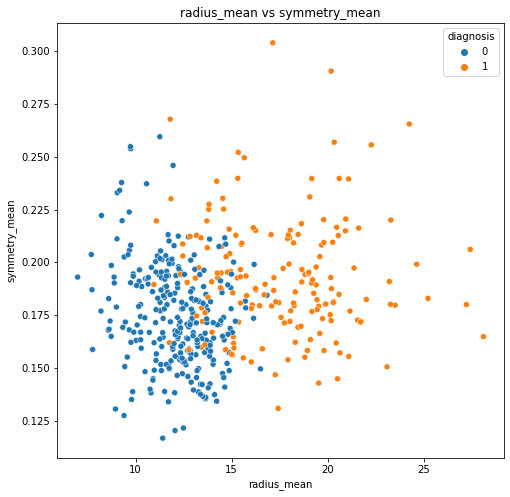

In [4]:
ml.print_scatter(train.radius_mean, train.symmetry_mean, train.diagnosis)

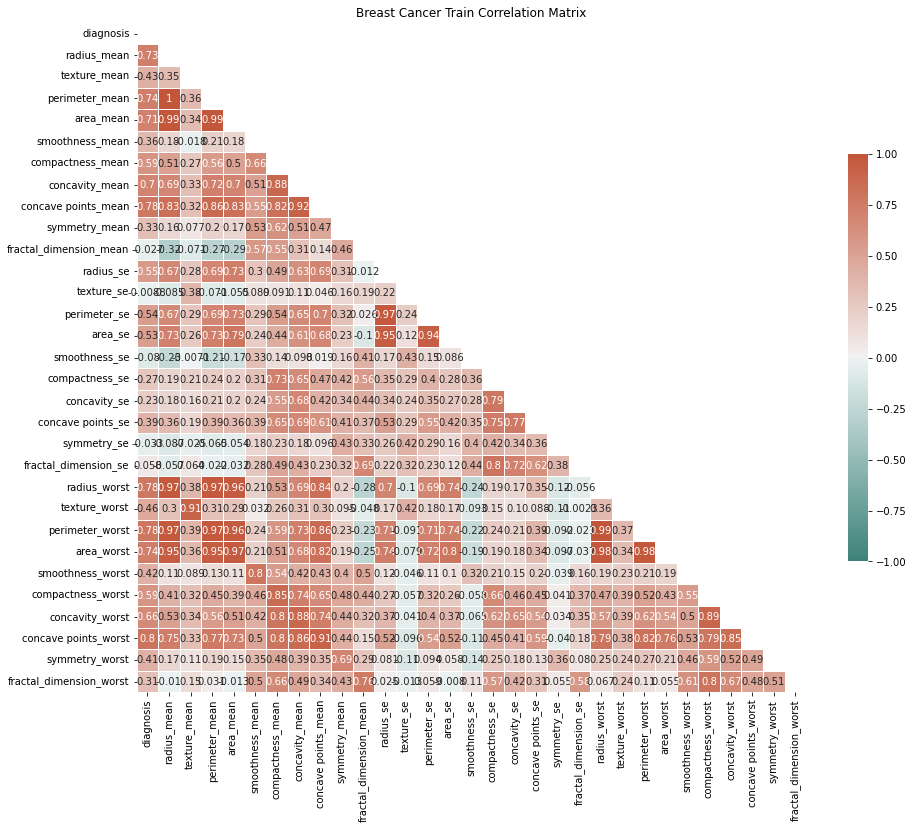

In [5]:
ml.print_correlation(train, 'Breast Cancer Train')

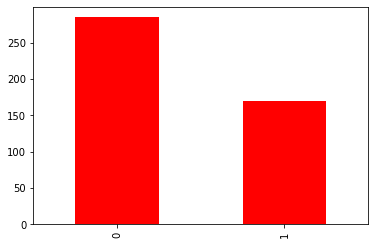

In [6]:
train.diagnosis.value_counts().plot(kind='bar', color='red');

In [16]:
X = train[['radius_mean', 'texture_mean', 'symmetry_mean']]
y = train.diagnosis

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=.2)

In [18]:
X_train.shape

(364, 3)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [20]:
from sklearn.metrics import f1_score, confusion_matrix, cohen_kappa_score,\
                            accuracy_score, precision_score, recall_score

In [21]:
rf = RandomForestClassifier()
lr = LogisticRegression(max_iter=2000)

models = [rf, lr]

In [22]:
for model in models:
    name = str(model)[:14]
    print(f'Training {name}')
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    f1_train= f1_score(y_train, pred_train)
    
    if f1_train > 0.96:
        print(f'f1_train of {name}: {f1_train}\n')
        pred_test = model.predict(X_test)
        f1_test = f1_score(y_test, pred_test)
        print(f'f1_text of {name}: {f1_test}')

Training RandomForestCl
f1_train of RandomForestCl: 1.0

f1_text of RandomForestCl: 0.8749999999999999
Training LogisticRegres
